In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np

In [2]:
extraction_dir = './survey-dataset/'

# List the files in the directory
extracted_files = os.listdir(extraction_dir)
extracted_files

['transformed_data.csv',
 'data.csv',
 'transformed_task_wise.csv',
 'sample_transformed_task_wise.csv']

In [3]:
file_path = os.path.join(extraction_dir, 'data.csv') # data.csv is user-wise data
print(file_path)

./survey-dataset/data.csv


In [4]:
# Read the CSV file
user_wise = pd.read_csv(file_path)

# Print all columns
print(user_wise.columns)

Index(['id', 'control task name', 'control task correctness',
       'control task validity', 'control task time in seconds',
       'control task answer', 'control task actions', 'ct-task-easiness',
       'ct-task-length', 'ct-task-interruption', 'ct-bug-found',
       'ct-bug-description', 'ct-debugger-help', 'ct-debugger-enjoy',
       'ct-debugger-efficient', 'ct-debugger-intuitive',
       'ct-debugger-easiness', 'ct-debugger-learn', 'treatment task name',
       'treatment task correctness', 'treatment task validity',
       'treatment task time in seconds', 'treatment task answer',
       'treatment task actions', 'tt-task-easiness', 'tt-task-length',
       'tt-task-interruption', 'tt-bug-found', 'tt-bug-description',
       'tt-debugger-help', 'tt-debugger-enjoy', 'tt-debugger-efficient',
       'tt-debugger-intuitive', 'tt-debugger-easiness', 'tt-debugger-learn',
       'experiment-easiness', 'experiment-length', 'ocd-help',
       'ocd-performance', 'ocd-productivity', 'ocd

In [5]:
data = pd.read_csv(file_path)

# Define columns to be extracted for control and treatment tasks
user_specific_columns = [
    'id', 'ocd-help', 'ocd-performance', 'ocd-productivity', 'ocd-effectiveness', 'ocd-easiness', 'ocd-usefulness',
    'learn-ocd', 'ocd-tasks-help', 'ocd-interaction', 'ocd-skills', 'ocd-debugging', 'ocd-use', 'ocd-future', 
    'ocd-over-classical', 'education', 'job-position', 'program-exp', 'pharo-exp', 'code-frequency', 
    'pharo-frequency', 'debugger-familiarity', 'debugger-ocd-familarity'
]

# Transform control and treatment specific columns to common columns and transform the user wise data to task wise data
control_columns = user_specific_columns + ['control task name', 'control task correctness', 'control task validity', 
                                           'control task time in seconds', 'control task answer', 'control task actions'] + \
                  [col for col in data.columns if col.startswith('ct-')]

treatment_columns = user_specific_columns + ['treatment task name', 'treatment task correctness', 'treatment task validity', 
                                             'treatment task time in seconds', 'treatment task answer', 'treatment task actions'] + \
                    [col for col in data.columns if col.startswith('tt-')]

# Create DataFrame for control tasks
control_data = data[control_columns].copy()
control_data['task'] = control_data['control task name']
control_data['condition'] = 'control'

# Create DataFrame for treatment tasks
treatment_data = data[treatment_columns].copy()
treatment_data['task'] = treatment_data['treatment task name']
treatment_data['condition'] = 'treatment'

# Standardize column names for merging
control_data.columns = user_specific_columns + ['task_name', 'correctness', 'validity', 'time_in_seconds', 'answer', 'actions'] + \
                       [col.replace('ct-', '') for col in control_data.columns[len(user_specific_columns)+6:-2]] + ['task', 'condition']

treatment_data.columns = user_specific_columns + ['task_name', 'correctness', 'validity', 'time_in_seconds', 'answer', 'actions'] + \
                         [col.replace('tt-', '') for col in treatment_data.columns[len(user_specific_columns)+6:-2]] + ['task', 'condition']

# Remove the 'task_name' column as it is now redundant
control_data = control_data.drop(columns=['task_name'])
treatment_data = treatment_data.drop(columns=['task_name'])

# Combine the control and treatment DataFrames
combined_data = pd.concat([control_data, treatment_data], ignore_index=True)

# Save the transformed data to a new CSV file
combined_data.to_csv(f"{extraction_dir}/transformed_data.csv", index=False, quoting=1)

# Display the first few rows of the transformed data
combined_data.head()

,id,ocd-help,ocd-performance,ocd-productivity,ocd-effectiveness,ocd-easiness,ocd-usefulness,learn-ocd,ocd-tasks-help,ocd-interaction,...,bug-found,bug-description,debugger-help,debugger-enjoy,debugger-efficient,debugger-intuitive,debugger-easiness,debugger-learn,task,condition
0,User-70721c71-20d5-0d00-a35f-0b230f90ea5645210...,,,,,,,,,,...,,,,,,,,,Lights Out,control
1,User-88a6276f-6bd5-0d00-a386-0d050eac3a2a50500...,Nor disagree or agree,Nor disagree or agree,Disagree,Nor disagree or agree,Nor disagree or agree,Nor disagree or agree,Nor disagree or agree,No choice,No choice,...,No,NaN,No choice,No choice,No choice,No choice,No choice,No choice,Lights Out,control
2,User-a2904209-ccc2-0d00-9778-6c840e6ed7ae51481...,Agree,Agree,Agree,Agree,Agree,Agree,Nor disagree or agree,Agree,Agree,...,Yes,One of the corner switches could not be switch...,Normally,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Lights Out,control
3,User-20d31f99-86c4-0d00-a363-69a60df93b8251470...,Strongly Agree,Agree,Agree,Strongly Agree,Nor disagree or agree,Agree,Strongly Agree,Agree,Strongly Agree,...,Yes,wrong data set with a not necessary space char...,Moderately,Agree,Nor disagree or agree,Disagree,Disagree,No choice,Ammolite,control
4,User-4a048f49-eec8-0d00-89f7-047b0e96ebda52859...,No choice,No choice,No choice,No choice,No choice,No choice,No choice,No choice,No choice,...,No,NaN,No choice,No choice,No choice,No choice,No choice,No choice,Ammolite,control


In [6]:
# Load the data
transformed_data = pd.read_csv(os.path.join(extraction_dir, 'transformed_data.csv'))  

# Trim leading and trailing whitespace from all string columns using apply and map
transformed_data = transformed_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

transformed_data.head()


,id,ocd-help,ocd-performance,ocd-productivity,ocd-effectiveness,ocd-easiness,ocd-usefulness,learn-ocd,ocd-tasks-help,ocd-interaction,...,bug-found,bug-description,debugger-help,debugger-enjoy,debugger-efficient,debugger-intuitive,debugger-easiness,debugger-learn,task,condition
0,User-70721c71-20d5-0d00-a35f-0b230f90ea5645210...,,,,,,,,,,...,,,,,,,,,Lights Out,control
1,User-88a6276f-6bd5-0d00-a386-0d050eac3a2a50500...,Nor disagree or agree,Nor disagree or agree,Disagree,Nor disagree or agree,Nor disagree or agree,Nor disagree or agree,Nor disagree or agree,No choice,No choice,...,No,NaN,No choice,No choice,No choice,No choice,No choice,No choice,Lights Out,control
2,User-a2904209-ccc2-0d00-9778-6c840e6ed7ae51481...,Agree,Agree,Agree,Agree,Agree,Agree,Nor disagree or agree,Agree,Agree,...,Yes,One of the corner switches could not be switch...,Normally,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Lights Out,control
3,User-20d31f99-86c4-0d00-a363-69a60df93b8251470...,Strongly Agree,Agree,Agree,Strongly Agree,Nor disagree or agree,Agree,Strongly Agree,Agree,Strongly Agree,...,Yes,wrong data set with a not necessary space char...,Moderately,Agree,Nor disagree or agree,Disagree,Disagree,No choice,Ammolite,control
4,User-4a048f49-eec8-0d00-89f7-047b0e96ebda52859...,No choice,No choice,No choice,No choice,No choice,No choice,No choice,No choice,No choice,...,No,NaN,No choice,No choice,No choice,No choice,No choice,No choice,Ammolite,control


In [7]:
# List of columns to inspect based on the presence
columns_to_inspect = [
    'task','condition','ocd-help', 'ocd-performance', 'ocd-productivity', 'ocd-effectiveness', 'ocd-easiness',
    'ocd-usefulness', 'learn-ocd', 'ocd-tasks-help', 'ocd-interaction', 'ocd-skills', 'ocd-debugging',
    'ocd-use', 'ocd-future', 'ocd-over-classical', 'education', 'job-position', 'program-exp', 
    'pharo-exp', 'code-frequency', 'pharo-frequency', 'debugger-familiarity', 'debugger-ocd-familarity', 'correctness','validity',
    'task-easiness', 'task-length', 'task-interruption', 'bug-found', 'debugger-help', 'debugger-enjoy', 
    'debugger-efficient', 'debugger-intuitive', 'debugger-easiness', 'debugger-learn'
]

# Inspect unique values for each column in the list
unique_values = {col: transformed_data[col].unique() if col in transformed_data.columns else f"{col} not found" for col in columns_to_inspect}
unique_values

{'task': array(['Lights Out', 'Ammolite', ''], dtype=object),
 'condition': array(['control', 'treatment'], dtype=object),
 'ocd-help': array(['', 'Nor disagree or agree', 'Agree', 'Strongly Agree',
        'No choice', 'Disagree'], dtype=object),
 'ocd-performance': array(['', 'Nor disagree or agree', 'Agree', 'No choice',
        'Strongly Agree'], dtype=object),
 'ocd-productivity': array(['', 'Disagree', 'Agree', 'No choice', 'Nor disagree or agree',
        'Strongly Agree'], dtype=object),
 'ocd-effectiveness': array(['', 'Nor disagree or agree', 'Agree', 'Strongly Agree',
        'No choice'], dtype=object),
 'ocd-easiness': array(['', 'Nor disagree or agree', 'Agree', 'No choice',
        'Strongly Agree', 'Disagree'], dtype=object),
 'ocd-usefulness': array(['', 'Nor disagree or agree', 'Agree', 'No choice',
        'Strongly Agree', 'Disagree'], dtype=object),
 'learn-ocd': array(['', 'Nor disagree or agree', 'Strongly Agree', 'No choice',
        'Agree', 'Disagree'], dtype=

In [8]:
#Remove unneccessary columns
transformed_data.drop(columns=['id', 'answer', 'bug-description'],axis=1,inplace=True)
print(transformed_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ocd-help                 162 non-null    object
 1   ocd-performance          162 non-null    object
 2   ocd-productivity         162 non-null    object
 3   ocd-effectiveness        162 non-null    object
 4   ocd-easiness             162 non-null    object
 5   ocd-usefulness           162 non-null    object
 6   learn-ocd                162 non-null    object
 7   ocd-tasks-help           162 non-null    object
 8   ocd-interaction          162 non-null    object
 9   ocd-skills               162 non-null    object
 10  ocd-debugging            162 non-null    object
 11  ocd-use                  162 non-null    object
 12  ocd-future               162 non-null    object
 13  ocd-over-classical       162 non-null    object
 14  education                162 non-null    o

In [9]:
# Replace empty strings with NaNs and then fill NaNs with default values for specific columns
transformed_data = transformed_data.replace("", pd.NA)

In [10]:
qualitative_mapping = {
    np.nan: np.nan,  # Use NaN for missing values
    "No choice": np.nan,  # Treat "No choice" as missing data
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Nor disagree or agree": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

education_mapping = {
    np.nan: np.nan,  # Use NaN for missing values
    "No choice": np.nan,  # Treat "No choice" as missing data
    "High School but did not graduate": 0,
    "High School": 1,
    "High School graduate or GED": 1,
    "Some college or 2-year degree": 2,
    "Bachelor in STEM (Science, Technology, Engineering and Mathematics)": 3,
    "Bachelor in a different area than CS or STEM": 3,
    "Bachelor in CS (Computer Science)": 3,
    "Master in CS": 4,
    "Master in STEM": 4,
    "Master in a different area than CS or STEM": 4,
    "PhD or higher academic title in STEM": 5,
    "PhD or higher academic title in CS": 5,
    "PhD or higher academic title in a different area than CS or STEM": 5
}

experience_mapping = {
    np.nan: np.nan,  # Use NaN for missing values
    "No choice": np.nan,  # Treat "No choice" as missing data
    "< 1": 1,
    "1-2 years": 2,
    "3-5 years": 3,
    "6-10 years": 4,
    "More than 10": 5,
    "More than 10 years": 5
}

frequency_mapping = {
    np.nan: np.nan,  # Use NaN for missing values
    "No choice": np.nan,  # Treat "No choice" as missing data
    "At least once per year": 1,
    "Less than once per month": 1,
    "At least once per month": 2,
    "At least once per week": 3,
    "At least once per day": 4,
}

interruption_mapping = {
    np.nan: np.nan,  # Use NaN for missing values
    "No choice": np.nan,  # Treat "No choice" as missing data
    "Not interrupted": 1,
    "1-2 minutes": 2,
    "up to 5 minutes": 3,
    'up to 10 minutes': 4,
    'more than 10 minutes': 5
}

job_position_mapping = {
    np.nan: np.nan,  # Use NaN for missing values
    "No choice": np.nan,  # Treat "No choice" as missing data
    "Student": 1,
    "Part-Time Dev": 2,
    "Full-Time Dev": 3,
    "Unemployed": 4,
    "Self-Employed": 5
}

bug_found_mapping = {
    np.nan: np.nan,  # Use NaN for missing values
    "No choice": np.nan, # Treat "No choice" as missing data
    "No": 0,
    "Yes": 1
}

correctness_and_validity_mapping = {
    np.nan: np.nan,  # Use NaN for missing values
    "No choice": np.nan,  # Treat "No choice" as missing data
    "nil": 0,
    "TRUE": 1,
    "FALSE": 0,
    "true": 1,
    "True": 1,
    "False": 0,
    "false": 0,
    True: 1,
    False: 0
}

debugger_help_mapping = {
    np.nan: np.nan,  # Use NaN for missing values
    "No choice": np.nan,  # Treat "No choice" as missing data
    "Not at all": 1,
    "Slightly": 2,
    "Moderately": 3,
    "Normally": 4,
    "Extremely": 5
}

condition_mapping = {
    np.nan: np.nan,  # Use NaN for missing values
    "No choice": np.nan, # Treat "No choice" as missing data
    "control": 0,
    "treatment": 1
}

task_mapping = {
    np.nan: np.nan,  # Use NaN for missing values
    "No choice": np.nan, # Treat "No choice" as missing data
    "Ammolite": 0,
    "Lights Out": 1
}

In [11]:
# Apply the mappings to the dataset
transformed_data.replace({
    'condition': condition_mapping,
    'task': task_mapping,
    'ocd-help': qualitative_mapping,
    'ocd-performance': qualitative_mapping,
    'ocd-productivity': qualitative_mapping,
    'ocd-effectiveness': qualitative_mapping,
    'ocd-easiness': qualitative_mapping,
    'ocd-usefulness': qualitative_mapping,
    'learn-ocd': qualitative_mapping,
    'ocd-tasks-help': qualitative_mapping,
    'ocd-interaction': qualitative_mapping,
    'ocd-skills': qualitative_mapping,
    'ocd-debugging': qualitative_mapping,
    'ocd-use': qualitative_mapping,
    'ocd-future': qualitative_mapping,
    'ocd-over-classical': qualitative_mapping,
    'education': education_mapping,
    'job-position': job_position_mapping,
    'program-exp': experience_mapping,
    'pharo-exp': experience_mapping,
    'code-frequency': frequency_mapping,
    'pharo-frequency': frequency_mapping,
    'debugger-familiarity': qualitative_mapping,
    'debugger-ocd-familarity': qualitative_mapping,
    'task-easiness': qualitative_mapping,
    'task-length': qualitative_mapping,
    'task-interruption': interruption_mapping,
    'validity': correctness_and_validity_mapping,
    'correctness': correctness_and_validity_mapping,
    'bug-found': bug_found_mapping,
    'debugger-help': debugger_help_mapping,
    'debugger-enjoy': qualitative_mapping,
    'debugger-efficient': qualitative_mapping,
    'debugger-intuitive': qualitative_mapping,
    'debugger-easiness': qualitative_mapping,
    'debugger-learn': qualitative_mapping
}, inplace=True)

# Check the transformed data
print(transformed_data.dtypes)

ocd-help                   float64
ocd-performance            float64
ocd-productivity           float64
ocd-effectiveness          float64
ocd-easiness               float64
ocd-usefulness             float64
learn-ocd                  float64
ocd-tasks-help             float64
ocd-interaction            float64
ocd-skills                 float64
ocd-debugging              float64
ocd-use                    float64
ocd-future                 float64
ocd-over-classical         float64
education                  float64
job-position               float64
program-exp                float64
pharo-exp                  float64
code-frequency             float64
pharo-frequency            float64
debugger-familiarity       float64
debugger-ocd-familarity    float64
correctness                float64
validity                   float64
time_in_seconds             object
actions                     object
task-easiness              float64
task-length                float64
task-interruption   

/var/folders/s2/x5xl_3ns3j51qbf9bqfmc4y80000gp/T/ipykernel_5562/3081282172.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_data.replace({


In [12]:
# since NaN are float by default, columns get converted to float.  Ensure time_in_seconds and actions remain float and convert remaining columns to int
float_columns = ['time_in_seconds', 'actions']

# Convert specific columns to integers, leave float columns as they are
for col in transformed_data.columns:
    if col not in float_columns:
        transformed_data[col] = transformed_data[col].astype('Int64')  # Use 'Int64' to handle NaNs properly

# Check the transformed data
print(transformed_data.dtypes)


ocd-help                    Int64
ocd-performance             Int64
ocd-productivity            Int64
ocd-effectiveness           Int64
ocd-easiness                Int64
ocd-usefulness              Int64
learn-ocd                   Int64
ocd-tasks-help              Int64
ocd-interaction             Int64
ocd-skills                  Int64
ocd-debugging               Int64
ocd-use                     Int64
ocd-future                  Int64
ocd-over-classical          Int64
education                   Int64
job-position                Int64
program-exp                 Int64
pharo-exp                   Int64
code-frequency              Int64
pharo-frequency             Int64
debugger-familiarity        Int64
debugger-ocd-familarity     Int64
correctness                 Int64
validity                    Int64
time_in_seconds            object
actions                    object
task-easiness               Int64
task-length                 Int64
task-interruption           Int64
bug-found     

In [13]:
# Save the transformed data to a new CSV file for further analysis
transformed_file_path = os.path.join(extraction_dir, 'transformed_task_wise.csv') # transformed_task_wise.csv is task-wise data
transformed_data.to_csv(transformed_file_path, index=False, quoting=1)

# Display the first few rows to confirm the changes
print(transformed_data.head())

   ocd-help  ocd-performance  ocd-productivity  ocd-effectiveness  \
0      <NA>             <NA>              <NA>               <NA>   
1         3                3                 2                  3   
2         4                4                 4                  4   
3         5                4                 4                  5   
4      <NA>             <NA>              <NA>               <NA>   

   ocd-easiness  ocd-usefulness  learn-ocd  ocd-tasks-help  ocd-interaction  \
0          <NA>            <NA>       <NA>            <NA>             <NA>   
1             3               3          3            <NA>             <NA>   
2             4               4          3               4                4   
3             3               4          5               4                5   
4          <NA>            <NA>       <NA>            <NA>             <NA>   

   ocd-skills  ...  task-interruption  bug-found  debugger-help  \
0        <NA>  ...               <NA>      

In [14]:
df = transformed_data

In [15]:
# Sanitize column names to avoid special characters issues
df.columns = df.columns.str.replace('-', '_').str.replace(' ', '_').str.replace(')', '')
print(df.columns)
print(df.head())

Index(['ocd_help', 'ocd_performance', 'ocd_productivity', 'ocd_effectiveness',
       'ocd_easiness', 'ocd_usefulness', 'learn_ocd', 'ocd_tasks_help',
       'ocd_interaction', 'ocd_skills', 'ocd_debugging', 'ocd_use',
       'ocd_future', 'ocd_over_classical', 'education', 'job_position',
       'program_exp', 'pharo_exp', 'code_frequency', 'pharo_frequency',
       'debugger_familiarity', 'debugger_ocd_familarity', 'correctness',
       'validity', 'time_in_seconds', 'actions', 'task_easiness',
       'task_length', 'task_interruption', 'bug_found', 'debugger_help',
       'debugger_enjoy', 'debugger_efficient', 'debugger_intuitive',
       'debugger_easiness', 'debugger_learn', 'task', 'condition'],
      dtype='object')
   ocd_help  ocd_performance  ocd_productivity  ocd_effectiveness  \
0      <NA>             <NA>              <NA>               <NA>   
1         3                3                 2                  3   
2         4                4                 4             

In [16]:

# Ensure all relevant columns are treated as numerical
df['time_in_seconds'] = pd.to_numeric(df['time_in_seconds'], errors='coerce')
df['actions'] = pd.to_numeric(df['actions'], errors='coerce')

In [17]:
print(df.columns)
df.to_csv(f"{extraction_dir}/sample_transformed_task_wise.csv", index=False, quoting=1)

Index(['ocd_help', 'ocd_performance', 'ocd_productivity', 'ocd_effectiveness',
       'ocd_easiness', 'ocd_usefulness', 'learn_ocd', 'ocd_tasks_help',
       'ocd_interaction', 'ocd_skills', 'ocd_debugging', 'ocd_use',
       'ocd_future', 'ocd_over_classical', 'education', 'job_position',
       'program_exp', 'pharo_exp', 'code_frequency', 'pharo_frequency',
       'debugger_familiarity', 'debugger_ocd_familarity', 'correctness',
       'validity', 'time_in_seconds', 'actions', 'task_easiness',
       'task_length', 'task_interruption', 'bug_found', 'debugger_help',
       'debugger_enjoy', 'debugger_efficient', 'debugger_intuitive',
       'debugger_easiness', 'debugger_learn', 'task', 'condition'],
      dtype='object')


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

In [19]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(exclude='object').columns.values

# Calculate the 99th percentile for each numerical column
percentiles = df[numerical_cols].quantile(0.99)

# Calculate the number of samples above the 99th percentile for each column
outliers_count = {}
for col in numerical_cols:
    outliers_count[col] = df[df[col] > percentiles[col]].shape[0]

# Print the number of outliers for each numerical column
print("Number of samples falling into the top 1% for each numerical column:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

# To visualize it, you can also create a DataFrame and display it
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Column', 'Outliers_Count'])
print(outliers_df)

Number of samples falling into the top 1% for each numerical column:
ocd_help: 0
ocd_performance: 0
ocd_productivity: 0
ocd_effectiveness: 0
ocd_easiness: 0
ocd_usefulness: 0
learn_ocd: 0
ocd_tasks_help: 0
ocd_interaction: 0
ocd_skills: 0
ocd_debugging: 0
ocd_use: 0
ocd_future: 0
ocd_over_classical: 0
education: 0
job_position: 0
program_exp: 0
pharo_exp: 0
code_frequency: 0
pharo_frequency: 0
debugger_familiarity: 0
debugger_ocd_familarity: 2
correctness: 0
validity: 0
time_in_seconds: 2
actions: 2
task_easiness: 0
task_length: 0
task_interruption: 0
bug_found: 0
debugger_help: 0
debugger_enjoy: 0
debugger_efficient: 0
debugger_intuitive: 0
debugger_easiness: 0
debugger_learn: 0
task: 0
condition: 0
                     Column  Outliers_Count
0                  ocd_help               0
1           ocd_performance               0
2          ocd_productivity               0
3         ocd_effectiveness               0
4              ocd_easiness               0
5            ocd_usefulnes

In [20]:
# Remove rows with values above the 99th percentile for any numerical column
for col in numerical_cols:
    df = df[df[col] <= percentiles[col]]

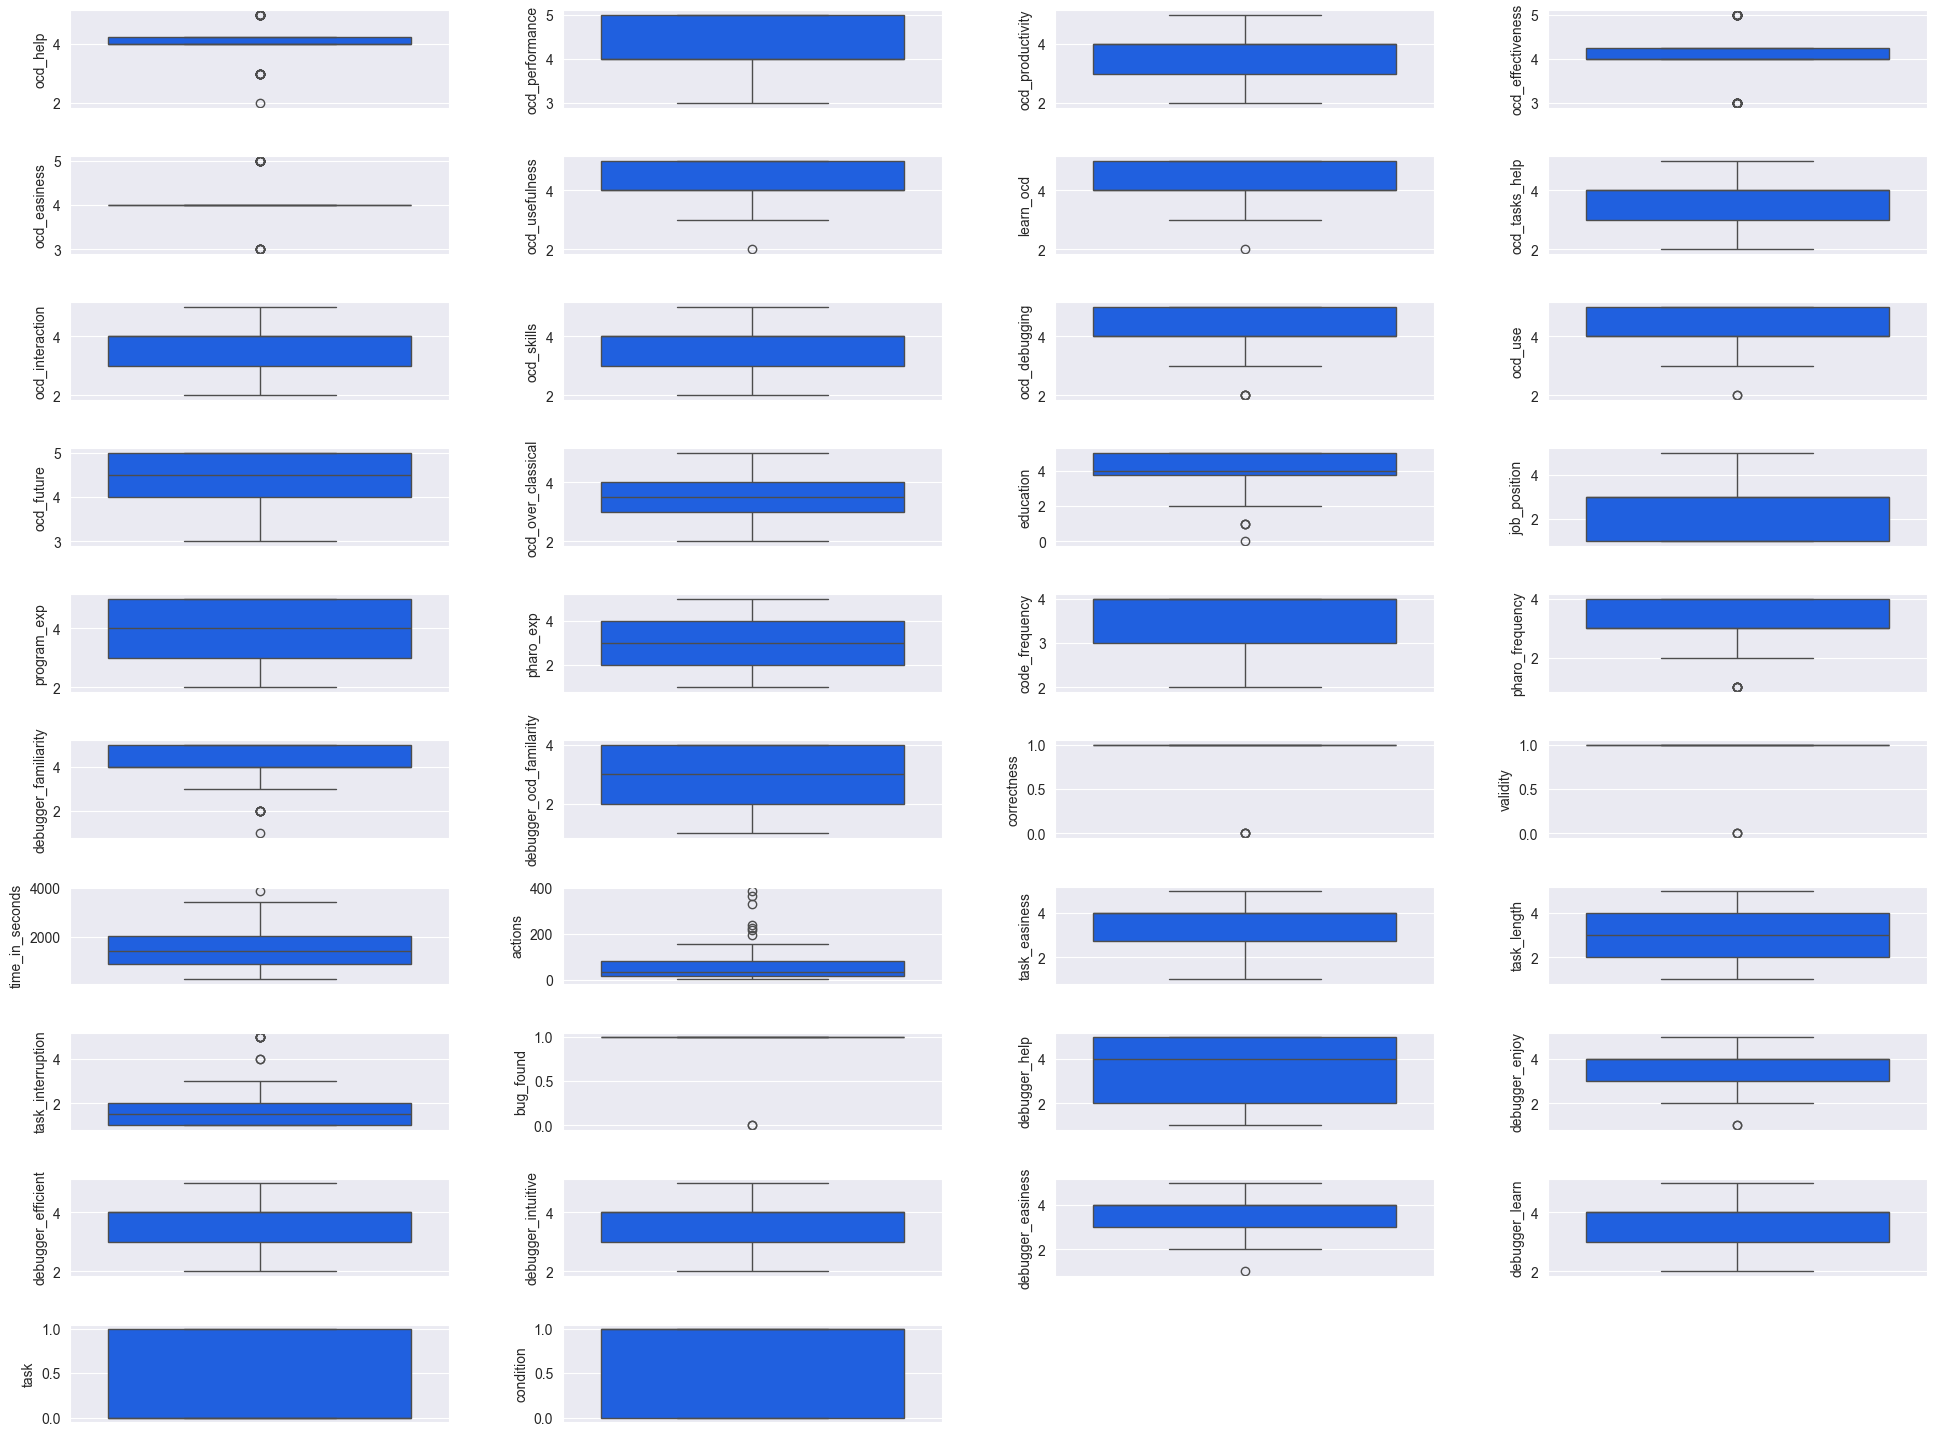

In [21]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

# Identify numerical and categorical columns again after outlier removal
numerical_cols = df.select_dtypes(exclude='object').columns.values
categorical_cols = df.select_dtypes(include='object').columns.values

OrderedCols = np.concatenate([numerical_cols,  categorical_cols])

# Determine the number of rows and columns for subplots
num_cols = 4
num_rows = int(np.ceil(len(OrderedCols) / num_cols))

fig, ax = plt.subplots(num_rows, num_cols, figsize=(20,15),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i // num_cols
    y = i % num_cols
    sns.boxplot(data=df, y=col, ax=ax[x,y])
    ax[x,y].yaxis.label.set_size(10)
    ax[x,y].xaxis.label.set_size(10)

for j in range(i + 1, num_rows * num_cols):
    x = j // num_cols
    y = j % num_cols
    fig.delaxes(ax[x, y])

plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

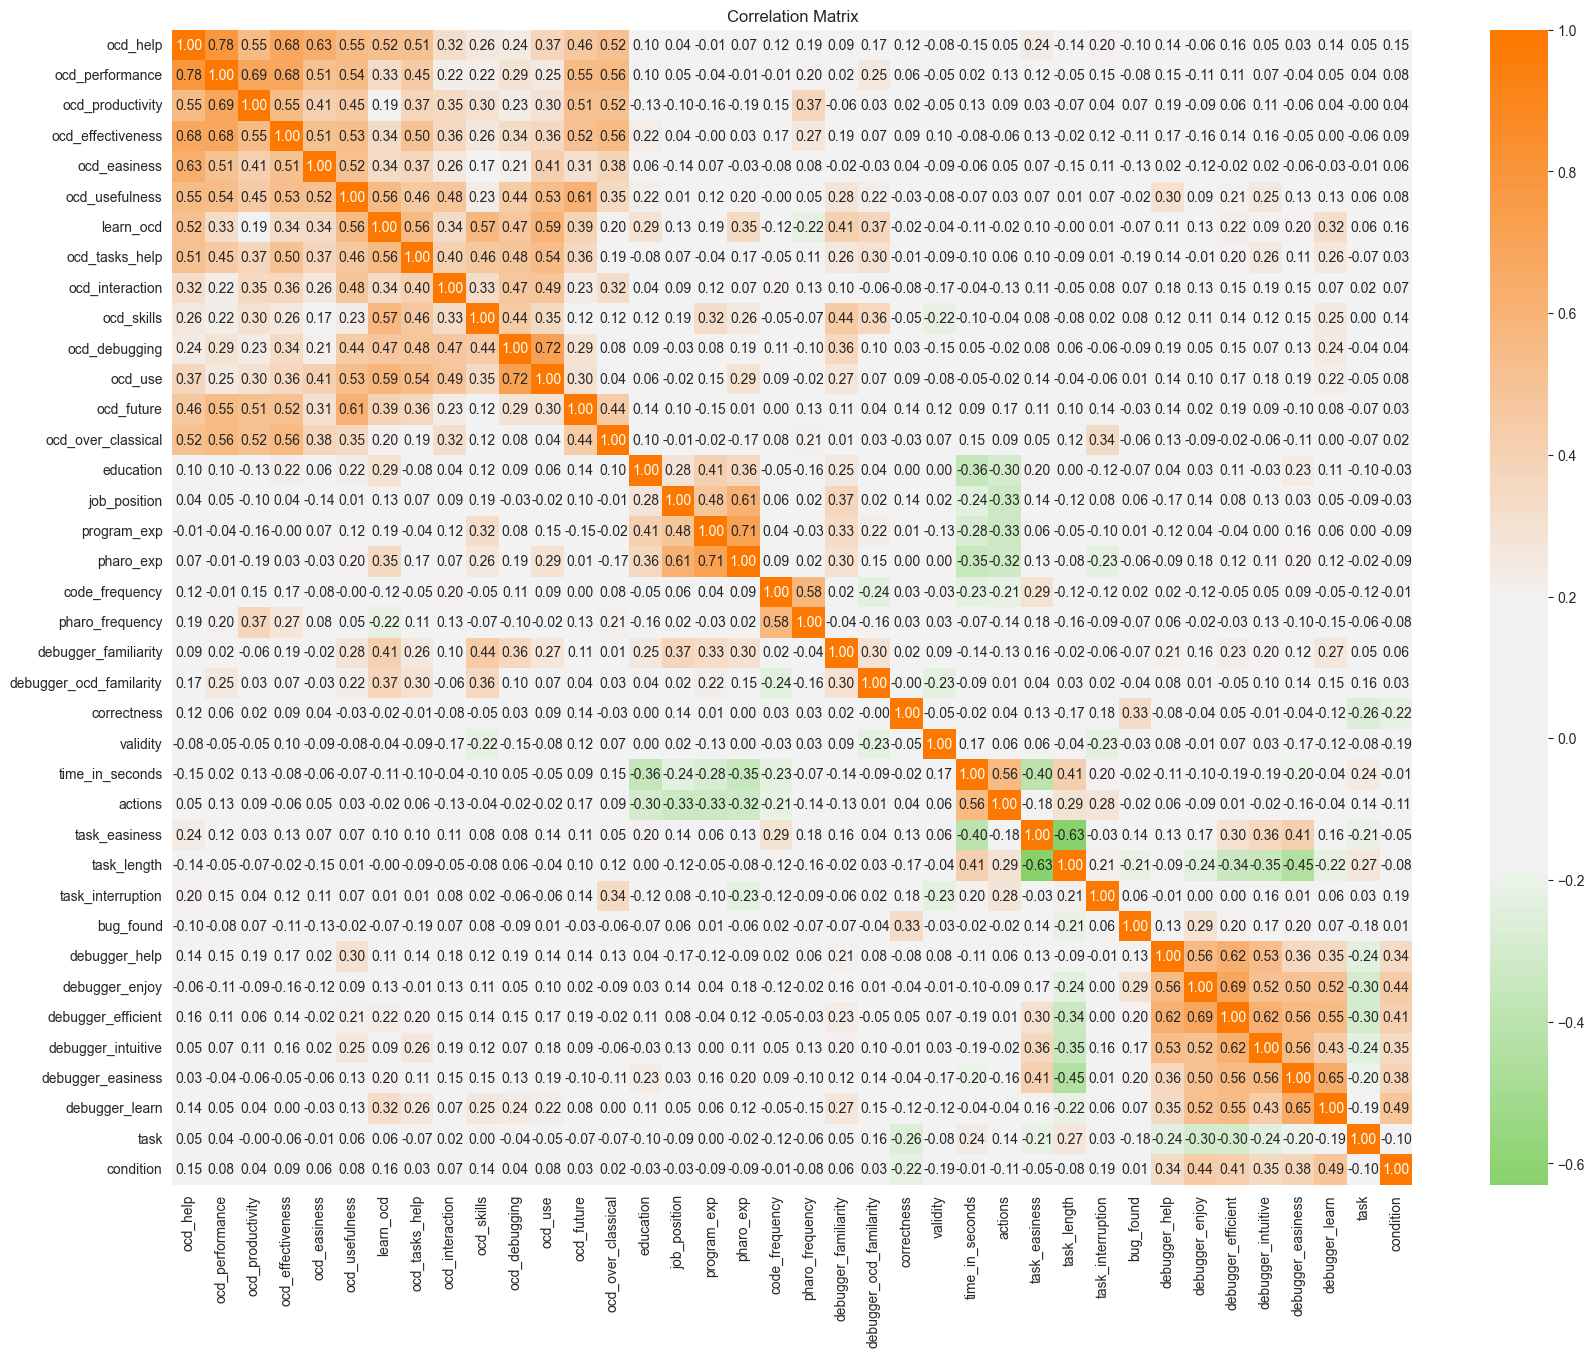

In [22]:
# Calculate the correlation matrix for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr().round(2)

# Display the correlation matrix
#print(correlation_matrix)
correlation_matrix.to_csv(f"{extraction_dir}/correlation_matrix.csv")  

# Plot the correlation matrix in a heatmap
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
plt.figure(figsize=(20, 15), dpi=100)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0,fmt='.2f')
plt.title('Correlation Matrix')

# Save the plot as a PDF
plt.savefig(f"{extraction_dir}/correlation_matrix.png")

plt.show()

In [23]:
#print(df.info())
df.to_csv(f"{extraction_dir}/regression_data.csv", index=False, quoting=1)

In [24]:
# data for regression
data = df[numerical_columns]
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 2 to 160
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ocd_help                 76 non-null     Int64  
 1   ocd_performance          76 non-null     Int64  
 2   ocd_productivity         76 non-null     Int64  
 3   ocd_effectiveness        76 non-null     Int64  
 4   ocd_easiness             76 non-null     Int64  
 5   ocd_usefulness           76 non-null     Int64  
 6   learn_ocd                76 non-null     Int64  
 7   ocd_tasks_help           76 non-null     Int64  
 8   ocd_interaction          76 non-null     Int64  
 9   ocd_skills               76 non-null     Int64  
 10  ocd_debugging            76 non-null     Int64  
 11  ocd_use                  76 non-null     Int64  
 12  ocd_future               76 non-null     Int64  
 13  ocd_over_classical       76 non-null     Int64  
 14  education                76 non-

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Correctness (Logistic Regression)
# Load the data
#data = pd.read_csv('transformed_task_wise.csv')

# Select relevant predictors
predictors = ['condition', 'task', 'education', 'job_position', 'program_exp', 'pharo_exp', 'code_frequency', 'pharo_frequency', 'debugger_familiarity', 'debugger_ocd_familarity']

X = data[predictors]
y = data['correctness']

# Create dummy variables for categorical predictors
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("\nCoefficients:")
print(coefficients.sort_values('Coefficient', ascending=False))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        16

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Coefficients:
                   Feature  Coefficient
3             job_position     0.534675
9  debugger_ocd_familarity     0.265101
8     debugger_familiarity     0.190075
7          pharo_frequency     0.033512
4              program_exp    -0.018285
6           code_frequency    -0.092940
2                education    -0.209955
5                pharo_exp    -0.352610
0                condition    -1.098229
1                     task    -1.141553


In [26]:
# Time in seconds (Multiple Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant predictors
predictors = ['condition', 'task', 'education', 'job_position', 'program_exp', 'pharo_exp', 'code_frequency', 'pharo_frequency', 'debugger_familiarity', 'debugger_ocd_familarity']

X = data[predictors]
y = data['time_in_seconds']

# Create dummy variables for categorical predictors
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Print coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients.sort_values('Coefficient', ascending=False))


R-squared: 0.269284256556961
Mean Squared Error: 381503.7553712034

Coefficients:
                   Feature  Coefficient
1                     task   113.835862
4              program_exp    86.278369
8     debugger_familiarity    80.999065
7          pharo_frequency     6.489591
3             job_position   -50.207281
9  debugger_ocd_familarity   -61.612848
0                condition   -73.947624
6           code_frequency  -150.677358
5                pharo_exp  -172.595458
2                education  -266.901685


In [27]:
# Actions (Poisson Regression)
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant predictors
predictors = ['condition', 'task', 'education', 'job_position', 'program_exp', 'pharo_exp', 'code_frequency', 'pharo_frequency', 'debugger_familiarity', 'debugger_ocd_familarity']

X = data[predictors]
y = data['actions']

# Create dummy variables for categorical predictors
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = PoissonRegressor(alpha=1.0)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Print coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients.sort_values('Coefficient', ascending=False))

R-squared: -2.4805144903212812
Mean Squared Error: 5757.151648263778

Coefficients:
                   Feature  Coefficient
9  debugger_ocd_familarity     0.044859
1                     task     0.004071
8     debugger_familiarity    -0.000485
4              program_exp    -0.007032
5                pharo_exp    -0.152830
6           code_frequency    -0.168214
7          pharo_frequency    -0.193768
3             job_position    -0.227930
2                education    -0.267137
0                condition    -0.284188


In [28]:
# Inspect the initial unique values in time_in_seconds column
#print("Initial unique values in actions:", data['actions'].unique())

# Drop rows with NaN values in the 'actions' column
data = data.dropna(subset=['actions'])

# Verify the unique values after dropping NaNs
#print("Unique values in actions after dropping NaNs:", data['actions'].unique())

# Drop rows with any remaining NaN values
data_cleaned = data.dropna()

actions_independent_vars = ['condition']
actions_control_vars = ['task','ocd_over_classical','program_exp', 'pharo_exp', 'pharo_frequency','education','job_position', 'task_easiness', 'task_length']

# Example: Perform regression analysis for 'bug found'
#regression_summary = build_ols_regression_model(data_cleaned,'actions', actions_independent_vars,actions_control_vars)
regression_summary = build_robust_regression_model(data_cleaned,'actions', actions_independent_vars,actions_control_vars)

print("Regression analysis for 'actions':")
print(regression_summary)

# Calculate VIF for each independent variable
X = data_cleaned[actions_independent_vars+actions_control_vars]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Plot residuals
residuals = model_robust.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Residuals vs Fitted
sns.residplot(x=model_robust.fittedvalues, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax[0].set_title('Residuals vs Fitted')
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')

# QQ plot
sm.qqplot(residuals, line='45', ax=ax[1])
ax[1].set_title('QQ plot')

plt.tight_layout()
plt.show()

NameError: name 'build_robust_regression_model' is not defined